# Indians Diabetes Prediction 

### About dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download) is available on Kaggle.


The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Columns
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age
* Outcome (0 = false, 1 = true)

## Importing Dependencies

In [1]:
# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# importing model tools

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, recall_score, confusion_matrix, classification_report

# Loading dataset

In [2]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the columns are in **Int/ Float** form, so there's no need to convert them.

## EDA

Comparing each parameters and visualising data to understand importance of each parameter

In [5]:
# checking nan values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, '0 = Non-diabetic ,1 = diabetic')

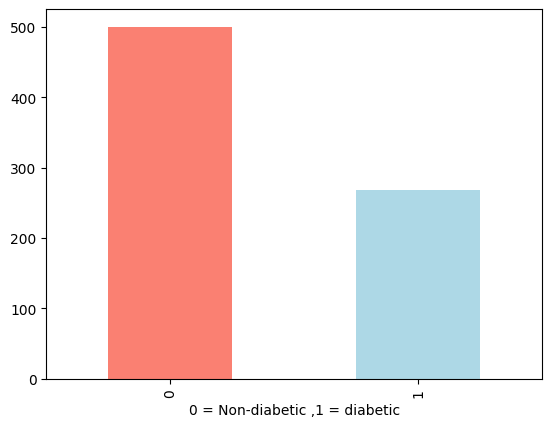

In [6]:
df["Outcome"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xlabel("0 = Non-diabetic ,1 = diabetic")

In [7]:
def plot_bar(param, name):
    plt.figure(figsize=(12,8))
    plt.axhline(np.mean(param),
                linestyle='dashed',
                color='g')
    graph_plot = plt.bar(np.arange(len(param)),
                        param,
                        color = "grey")
    plt.xticks(np.arange(len(param)))
    plt.xlabel(name)
    plt.ylabel("Values")
    plt.title(name)
    
    for i in range(len(param)):
        if(df["Outcome"][i]==1):
            graph_plot[i].set_color("red")

## Visualising Glucose levels

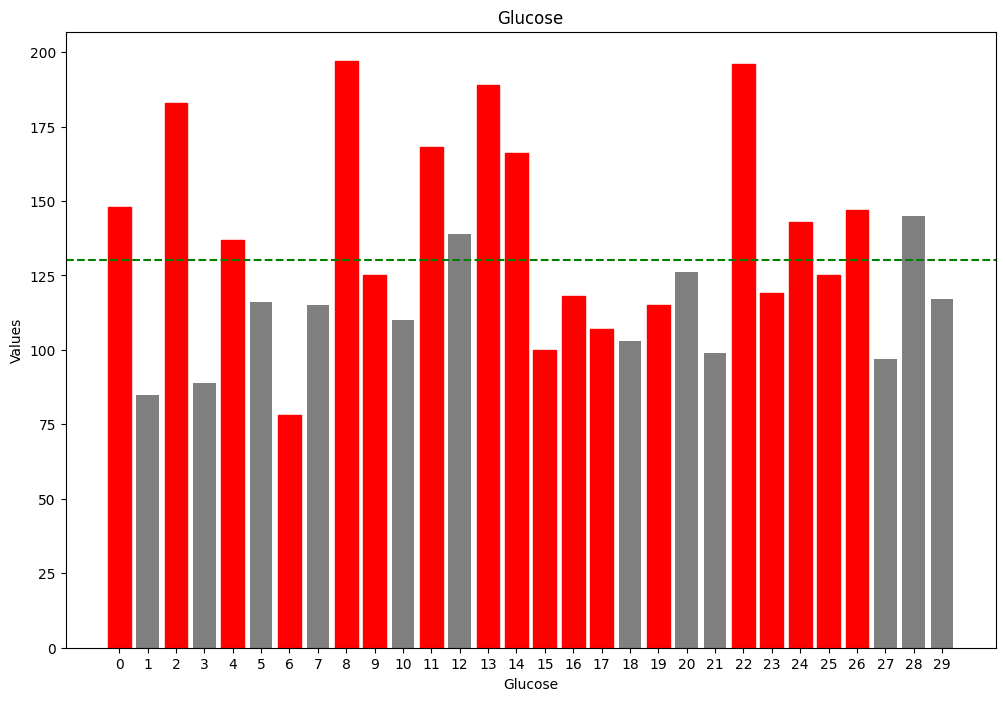

In [8]:
plot_bar(df["Glucose"][:30], "Glucose")

## Visualising Blood Pressure levels

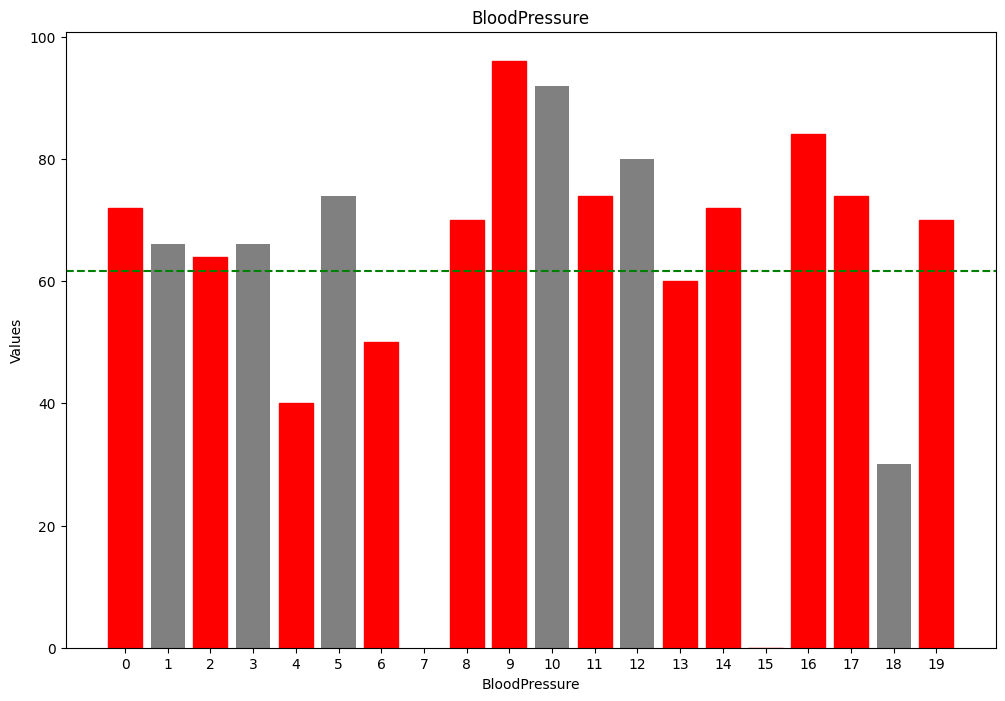

In [9]:
plot_bar(df["BloodPressure"][:20],"BloodPressure")

## Visualising Age effects

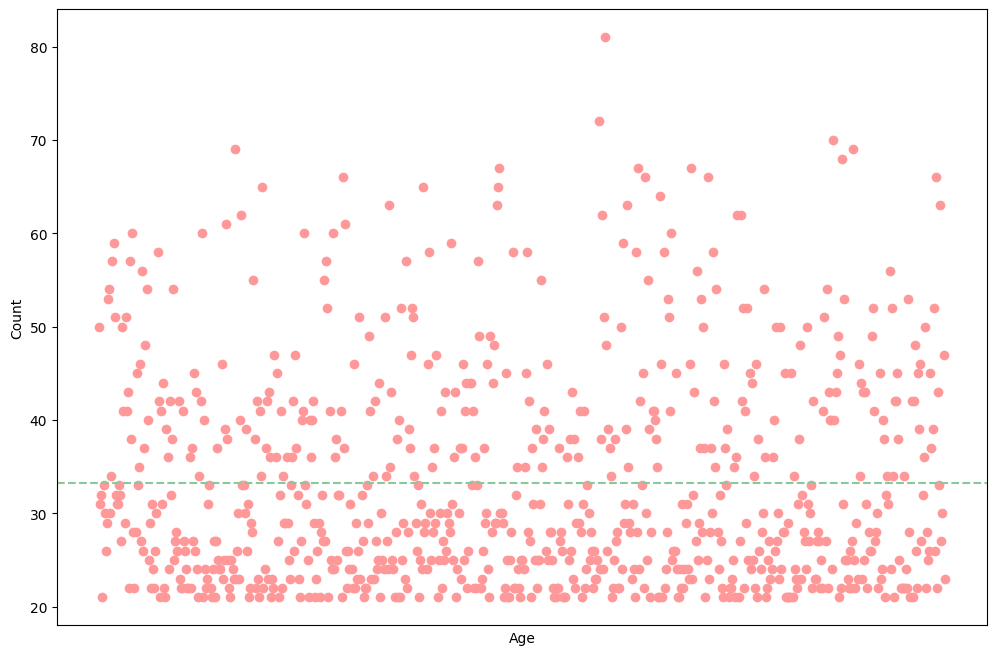

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(len(df["Age"])),df["Age"], color="#ff9899")
plt.xticks([])
plt.xlabel("Age")
plt.ylabel("Count")
plt.axhline(df["Age"].mean(),
           linestyle='dashed',
                color='#88c999')

**Average** patient if found to be in age-group = `30-35`

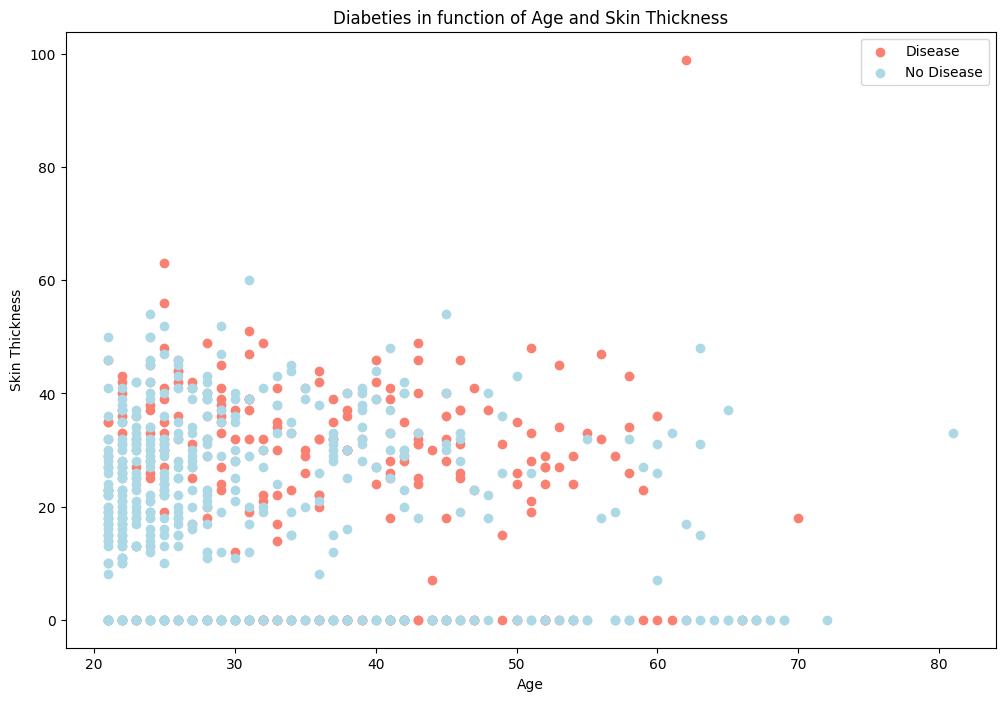

In [11]:
# Create another figure
plt.figure(figsize=(12, 8))

# Scatter with postivie examples
plt.scatter(df.Age[df.Outcome==1],
            df.SkinThickness[df.Outcome==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.Outcome==0],
            df.SkinThickness[df.Outcome==0],
            c="lightblue")

# Add some helpful info
plt.title("Diabeties in function of Age and Skin Thickness")
plt.xlabel("Age")
plt.ylabel("Skin Thickness")
plt.legend(["Disease", "No Disease"]);

**Someone** with higher skin thickness than average are more prone to be diabetic

## Checking correlation of parameters

<Axes: >

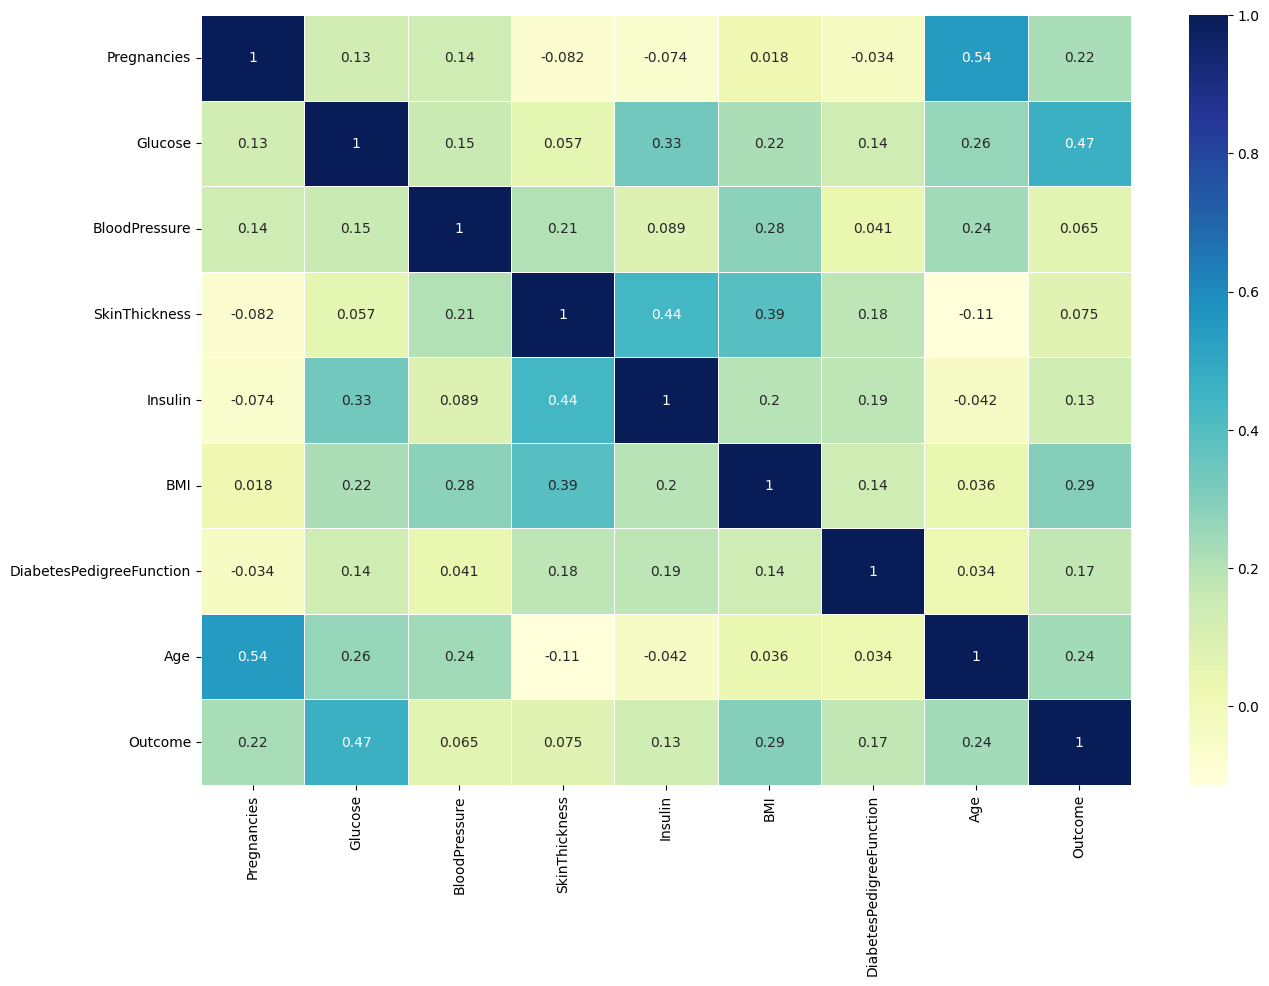

In [12]:
corr_mat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,
           annot=True,
           cbar=True,
           linewidths=0.5,
           cmap="YlGnBu")

**Glucose** is found to be the most effective parameter

## Modeling

### Preparing data

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Splitting data into test and train parts

In [14]:
X = df.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [17]:
len(X_train), len(X_test)

(614, 154)

Data is splitted into Test and Train. 


### Preparing models

We're going to try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [18]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [19]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/home/karanxidhu/code/heart-disease/heartD/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6623376623376623,
 'Logistic Regression': 0.7467532467532467,
 'Random Forest': 0.7207792207792207}

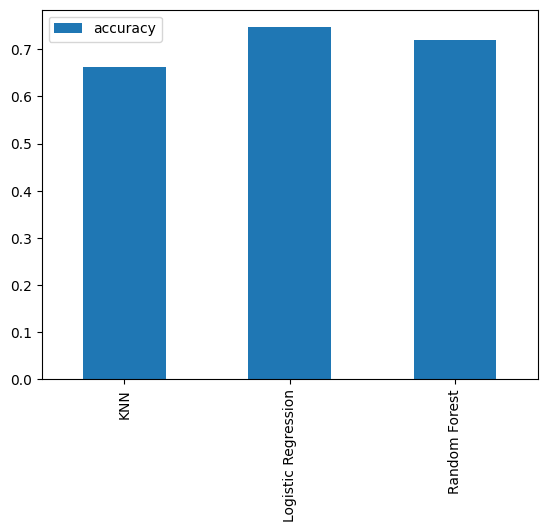

In [20]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

For now **Logistic Regression** is performing best amoung three followed by **Random Forest**.

Now we will try `Hyperparameter tuning` for better results

### Hyperparameter tuning

Firslty we are proceeding with **Logistic Regression** using RandomizedSearchCV.

In [21]:
log_reg_grid = {"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                "penalty":["l1","l2","elasticnet"],
                "C":[100, 10, 1.0, 0.1, 0.01]}

In [ ]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=70,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

In [23]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}

In [24]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

Model improved a **little bit**

Finding best params with **GridSearchCV** this time.

In [25]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [26]:
logModel = LogisticRegression()

In [27]:
clf = GridSearchCV(logModel,
                   param_grid = param_grid,
                   cv = 5,
                   verbose=True,
                   n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

In [29]:
clf.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [30]:
log_res_new_score = clf.score(X_test,y_test)
log_res_new_score

0.7597402597402597

We are getting `0.7597402597402597` accuracy after tunning the model

In [31]:
model_comp2 = pd.DataFrame([log_res_new_score,model_scores["Logistic Regression"]],
                            columns=["accuracy"],
                            index=["New","Old"])

<Axes: >

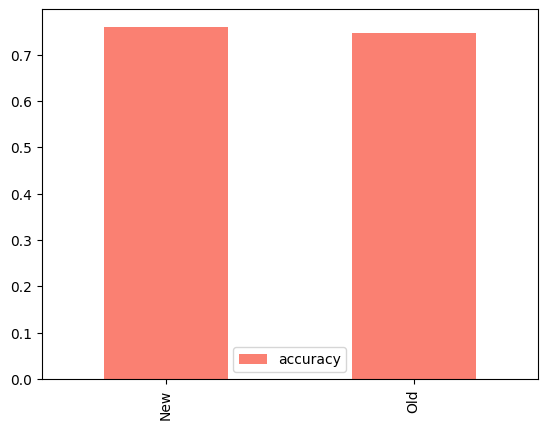

In [32]:
model_comp2.plot.bar(color="salmon")

Proceeding with Hyper parameter tunning of **Random Forest Class**

In [33]:
rf = RandomForestClassifier()

In [34]:
rf_grid = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [35]:
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = rf_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

In [37]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [38]:
rf_random.score(X_test,y_test)

0.7467532467532467

 We ar getting `0.7467532467532467` score after finding best parameters from **RandomizedSearchCV**

We can try out other values of parameters to improve our model 

## Evaluating model

In [39]:
y_preds = clf.predict(X_test)

In [40]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [41]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [42]:
from sklearn.metrics import RocCurveDisplay

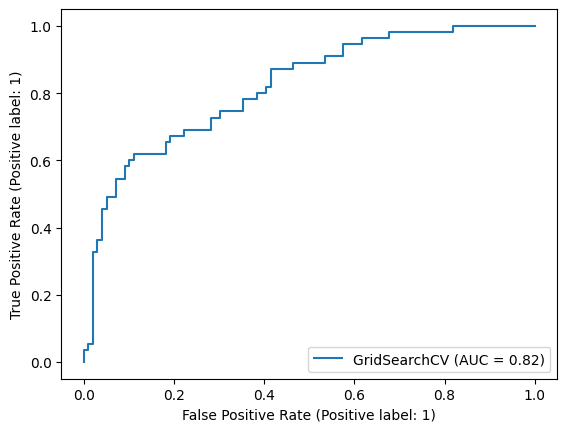

In [43]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)

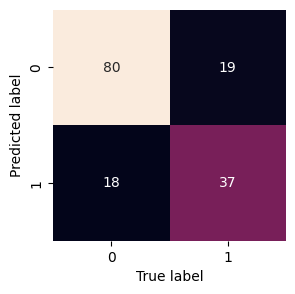

In [44]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



## Finding important features

After manual try we found `C=0.23357214690901212, solver='liblinear'` using these parameters our model is performing better.

In [46]:
clf_  = LogisticRegression(C=0.23357214690901212,
                          solver="liblinear")
clf_.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [47]:
clf_.score(X_test,y_test)

0.7792207792207793

We have achieved accuracy of `0.7792207792207793`

In [48]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf_.coef_[0])))
feature_dict

{'Pregnancies': 0.07581154853393185,
 'Glucose': 0.018601323705155912,
 'BloodPressure': -0.023429400472243636,
 'SkinThickness': 0.0003466035082175241,
 'Insulin': -0.00026602649203826635,
 'BMI': 0.032473747074458346,
 'DiabetesPedigreeFunction': 0.2670098544174406,
 'Age': 0.012033123960643807}

### Visuals of important features

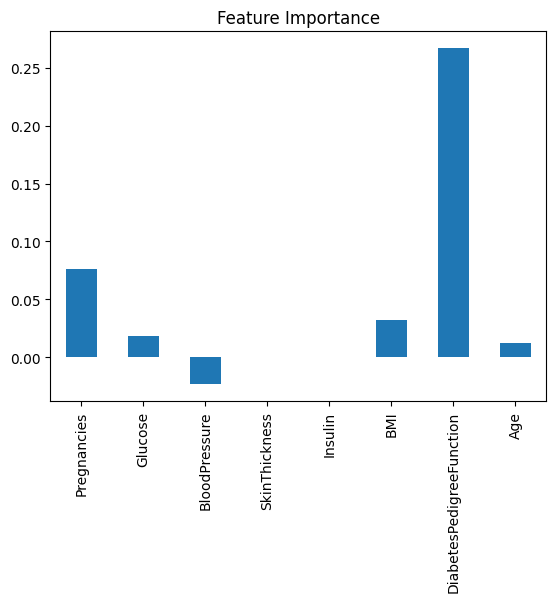

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   3.3s
[CV] END bootstrap=True, max_depth=70, 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=   5.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   4.3s
[CV] END bootstrap=True, max_depth=9

[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   4.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   0.0s
[CV] END bootstrap=False, max_depth=

In [50]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);